In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [126]:


# dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake0/'
# df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
data =pd.read_csv('/content/sample_data/train.csv')
classes=(data.groupby('y').count()).index.tolist()

In [44]:
classes

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [45]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

no null values 

# Check the data is balanced or not ? 


**[recommend this article to understand data balance ](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)**

In [48]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


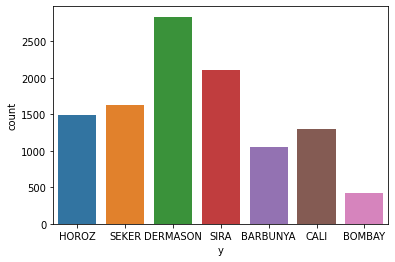

In [49]:
g = sns.countplot(data['y'])
plt.show()

## we can see that there is a  difference between the  classes in the data set data set.

In [50]:
X_data =  data.drop('y' , axis=1)
y_data = data["y"]

In [51]:
# import library
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_data, y_data)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('BARBUNYA', 2837), ('BOMBAY', 2837), ('CALI', 2837), ('DERMASON', 2837), ('HOROZ', 2837), ('SEKER', 2837), ('SIRA', 2837)]


In [52]:
y_resampled=pd.DataFrame(y_resampled)
y_resampled.head()

,y
0,HOROZ
1,SEKER
2,DERMASON
3,DERMASON
4,SIRA


In [54]:
data_balanced = pd.concat([X_resampled , y_resampled] , axis=1)
data_balanced.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


### Now My data is balanced 



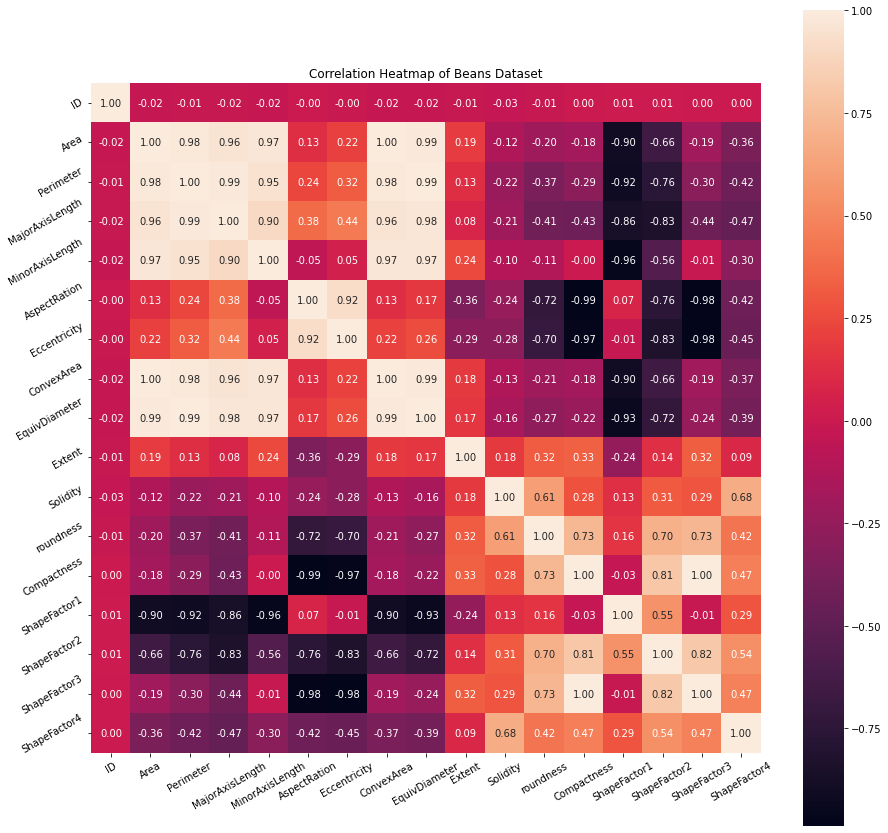

In [55]:
corr_matrix = data_balanced.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [58]:
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat)

Compactness      AspectRation      -0.987304
AspectRation     Compactness       -0.987304
Eccentricity     ShapeFactor3      -0.981582
ShapeFactor3     Eccentricity      -0.981582
                 AspectRation      -0.978157
                                      ...   
MajorAxisLength  MajorAxisLength    1.000000
Perimeter        Perimeter          1.000000
Area             Area               1.000000
ShapeFactor3     ShapeFactor3       1.000000
ShapeFactor4     ShapeFactor4       1.000000
Length: 289, dtype: float64


In [59]:
# Create correlation matrix

corr_matrix = data_balanced.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [60]:
data_balanced = data_balanced.drop(data_balanced[to_drop], axis=1)

In [62]:
data_balanced=data_balanced.drop("ID" , axis=1)

In [63]:
data_balanced.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,y
0,58238,2.124697,0.882317,0.604756,0.987470,0.775723,0.000929,0.998595,HOROZ
1,44515,1.241266,0.592420,0.771745,0.994082,0.974620,0.002376,0.997370,SEKER
2,31662,1.424417,0.712136,0.801407,0.988387,0.930853,0.002293,0.997737,DERMASON
3,38778,1.458456,0.727925,0.766137,0.989033,0.904439,0.002005,0.999250,DERMASON
4,42530,1.455275,0.726511,0.729816,0.988426,0.888895,0.001912,0.996507,SIRA


In [67]:
X_data = data_balanced.drop("y" , axis=1)
y_data =pd.DataFrame(data_balanced['y'])

# Start To Normalize data 

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_data)
train_scaled = pd.DataFrame(train_scaled , columns= X_data.columns)

In [69]:
train_scaled.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,0.161480,0.806323,0.962493,0.159036,0.904445,0.570991,0.117763,0.978144
1,0.102884,0.158649,0.541875,0.696185,0.992108,0.967937,0.584350,0.954606
2,0.048003,0.292923,0.715573,0.791600,0.916611,0.880589,0.557595,0.961666
3,0.078387,0.317879,0.738483,0.678145,0.925168,0.827875,0.464513,0.990730
4,0.094408,0.315547,0.736430,0.561313,0.917125,0.796852,0.434817,0.938025


In [111]:
train_scaled.columns

Index(['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4'],
      dtype='object')

In [ ]:
# !pip install fast_ml --upgrade

# from fast_ml.model_development import train_valid_test_split

In [74]:
X_train, X_val, y_train, y_val = train_test_split(train_scaled, y_data , test_size=0.2, random_state=2,shuffle =True)

###  Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
-  AdaBoostClassifier

In [75]:
from scipy.sparse.construct import random
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier  # Accuracy =  0.9307798800184587
from sklearn.ensemble import RandomForestClassifier #Accuracy =  0.9312413474850023
from sklearn.ensemble import HistGradientBoostingClassifier #Accuracy =  0.930318412551915

from sklearn.ensemble import GradientBoostingClassifier #Accuracy =  0.9293954776188279
from sklearn.ensemble import BaggingClassifier#Accuracy =  0.9164743885556068


from sklearn.neighbors import KNeighborsClassifier #bad
from sklearn.ensemble import ExtraTreesClassifier #Accuracy =  0.9307798800184587
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm


In [76]:
ex_model =ExtraTreesClassifier(random_state=42).fit(X_train, y_train)
print("Decision tree:",ex_model.score(X_val, y_val))


Decision tree: 0.9672708962739174


In [79]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)




from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)


from sklearn.ensemble import ExtraTreesClassifier  
ex_modeal = ExtraTreesClassifier().fit(X_train, y_train)




In [80]:
print("Scores of the models")
print("Logistic regression:", lr_model.score(X_val, y_val))
print("Decision tree:", dt_model.score(X_val, y_val))
print("SVM:", svm_model.score(X_val, y_val))
print("Random forest:", rf_model.score(X_val, y_val))
print("Gradient boosting:", gb_model.score(X_val, y_val))
print("AdaBoost:", ab_model.score(X_val, y_val))
print("ex_modeal:", ex_modeal.score(X_val, y_val))



Scores of the models
Logistic regression: 0.9181772406847936
Decision tree: 0.9579556898288016
SVM: 0.9297583081570997
Random forest: 0.9685297079556898
Gradient boosting: 0.9511581067472307
AdaBoost: 0.8147029204431017
ex_modeal: 0.9682779456193353


In [84]:
lr_predicted_labels = lr_model.predict(X_val)
lr_predicted_labels

array(['SIRA', 'HOROZ', 'SEKER', ..., 'DERMASON', 'BOMBAY', 'SEKER'],
      dtype=object)

In [86]:
from sklearn.metrics import f1_score

print("F1-scores of the models:")

lr_predicted_labels = lr_model.predict(X_val)
print("Logistic regression:", f1_score(  y_val  , lr_predicted_labels ,   average='micro') )

dt_predicted_labels = dt_model.predict(X_val)
print("Decision Tree:", f1_score(y_val, dt_predicted_labels ,average='micro'))

svm_predicted_labels = svm_model.predict(X_val)
print("Support Vector Machine:", f1_score(y_val, svm_predicted_labels ,average='micro'))

rf_predicted_labels = rf_model.predict(X_val)
print("Random Forest:", f1_score(y_val, rf_predicted_labels, average='micro'))

gb_predicted_labels = gb_model.predict(X_val)
print("Gradient boosting:", f1_score(y_val, gb_predicted_labels, average='micro'))

ab_predicted_labels = ab_model.predict(X_val)
print("AdaBoost:", f1_score(y_val, ab_predicted_labels, average='micro'))

ex_predicted_labels = ex_modeal.predict(X_val)
print("ExtraTreesClassifier:", f1_score(y_val, ex_predicted_labels, average='micro'))

F1-scores of the models:
Logistic regression: 0.9181772406847936
Decision Tree: 0.9579556898288016
Support Vector Machine: 0.9297583081570997
Random Forest: 0.9685297079556898
Gradient boosting: 0.9511581067472307
AdaBoost: 0.8147029204431018
ExtraTreesClassifier: 0.9682779456193353


# Try another model 

In [89]:
LGBM = LGBMClassifier(learning_rate=0.19,max_depth=6,n_estimators=120,reg_lambda=0.25,num_leaves = 46,class_weight ='balanced').fit(X_train,y_train)

LGBMClassifier: 0.9702920443101712


In [94]:
print("model acc with training data \n")
pred_train=LGBM.predict(X_train)
print(f1_score(y_train,pred_train,average='macro'))

print("\nmodel acc with validation data \n")

print( LGBM.score(X_val, y_val))

print("\n model acc with test on  validation data\n  ")

pred_val=LGBM.predict(X_val)
print(f1_score(y_val,pred_val,average='macro'))
# 


model acc with training data 

0.9991843901347909

model acc with validation data 

0.9702920443101712

 model acc with test on  validation data
  
0.9701493796332965


In [ ]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
import os 
test_data = pd.read_csv(os.path.join(dataset_path, 'test.csv'))




In [118]:
test_data = pd.read_csv("/content/sample_data/test.csv")
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

In [119]:
test_data = test_data[['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4']]
# data_balanced = data_balanced.drop(data_balanced[to_drop], axis=1)

In [120]:
test_data.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,57659,1.972059,0.861896,0.620790,0.957982,0.793735,0.000989,0.962889
1,28772,1.440960,0.719993,0.767458,0.987812,0.909913,0.002365,0.997956
2,54677,1.364204,0.680198,0.753013,0.978857,0.827860,0.001856,0.995607
3,24827,1.449322,0.723831,0.716508,0.988297,0.932871,0.002526,0.998596
4,141850,1.513136,0.750492,0.804617,0.987263,0.868240,0.000981,0.991803


In [121]:
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test_data)
test_scaled = pd.DataFrame(test_scaled , columns= test_data.columns)


In [122]:
pred_val=LGBM.predict(test_scaled)


In [123]:
Alldata = pd.read_excel("/content/sample_data/Dry_Bean_Dataset_full.xlsx")
Alldata.shape

(13611, 17)